In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
import numpy as np
import torch
import scanpy as sc
import muon as mu
import anndata
import mudata
import pandas as pd

print(anndata.__version__)
print(mudata.__version__)
print(sc.__version__)
print(torch.__version__)

0.8.0
0.2.1
1.9.2
1.11.0


In [4]:
%load_ext autoreload
%autoreload 2

In [18]:
from src.mvae.model import MVAE
from src.mvae.train import train_mvae
from src.mvae.dataloader import setup_mudata
from src.mvae.diagnostics import plot_embedding, classification_performance
from src.types import TrainParams
from src.model import ModelParams

In [6]:
mdata = mu.read('/media/yob/nacho_stuff/prostate_cancer/Integration/MVAE-PoE/OtF-prostate/data/mdata_preprocessed_final_filtered.h5mu')

In [7]:
metadata = mu.read('/media/yob/nacho_stuff/prostate_cancer/Integration/MVAE-PoE/OtF-prostate/data/mdata_metadata.h5mu')
mdata.obs["new_ann"] = metadata.obs["new_ann"]
mdata.mod["msi"].obs["new_ann"] = metadata.obs["new_ann"]
mdata.mod["rna"].obs["new_ann"] = metadata.obs["new_ann"]

In [8]:
setup_mudata(mdata, batch_key="sample")

16

In [9]:
mdata

MuData object with n_obs × n_vars = 42475 × 31460
  obs:	'sample', 'tissue', 'patient', 'ann', 'imagerow', 'imagecol', 'new_ann', 'batch_id'
  2 modalities
    rna:	42475 x 18950
      obs:	'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'size_factors', 'sample', 'type', 'patient', 'ann', 'tissue', 'imagerow', 'imagecol', 'new_ann', 'batch_id'
      obsm:	'spatial'
      layers:	'counts', 'scran_normalization', 'spotclean'
    msi:	42475 x 12510
      obs:	'ST_barcode', 'sample', 'tissue', 'patient', 'ann', 'imagerow', 'imagecol', 'new_ann', 'batch_id'
      obsm:	'spatial'

## No LISI

In [15]:
train_params = TrainParams(add_lisi_loss=False, train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="mvae_beta0.001_gamma0")
model_params = ModelParams(beta=0.001, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = MVAE(mdata, model_params)

In [16]:
train_mvae(model, mdata, train_params,"sample")

Train data size: 33980
Test data size: 8495


100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:11<00:00,  3.72it/s]

EarlyStopping (epoch: 1): train loss improved to 0.054547713096174094



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:19<00:00,  3.41it/s]

EarlyStopping (epoch: 1): valid loss improved to 3.189849853515625



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:07<00:00,  3.95it/s]

EarlyStopping (epoch: 2): train loss improved to 0.021704483888232054



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.76it/s]

EarlyStopping (epoch: 2): valid loss improved to 2.482489767359264



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.86it/s]

EarlyStopping (epoch: 3): valid loss improved to 2.2178070936630023



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.72it/s]

EarlyStopping (epoch: 4): valid loss improved to 2.071866914407531



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.82it/s]

EarlyStopping (epoch: 5): valid loss improved to 1.9730185341479174



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:18<00:00,  3.57it/s]

EarlyStopping (epoch: 6): valid loss improved to 1.9045934481407278



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:19<00:00,  3.48it/s]

EarlyStopping (epoch: 7): valid loss improved to 1.8587270263415665



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:16<00:00,  4.01it/s]

EarlyStopping (epoch: 8): valid loss improved to 1.8243234460033588



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:18<00:00,  3.71it/s]

EarlyStopping (epoch: 9): valid loss improved to 1.799938233930673



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:18<00:00,  3.71it/s]

EarlyStopping (epoch: 10): valid loss improved to 1.7812418830928518



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:18<00:00,  3.71it/s]

EarlyStopping (epoch: 11): valid loss improved to 1.771126261397974



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:06<00:00,  3.97it/s]

EarlyStopping (epoch: 12): train loss hasn't improved: 0.014298309211242612. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.88it/s]

EarlyStopping (epoch: 12): valid loss improved to 1.7544732129395897



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:11<00:00,  3.70it/s]

EarlyStopping (epoch: 13): train loss hasn't improved: 0.014212364523182062. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:09<00:00,  3.80it/s]

EarlyStopping (epoch: 14): train loss hasn't improved: 0.014138158277036725. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.88it/s]

EarlyStopping (epoch: 14): valid loss improved to 1.7409487535704429



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:13<00:00,  3.64it/s]

EarlyStopping (epoch: 15): train loss hasn't improved: 0.01407796563717672. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.73it/s]

EarlyStopping (epoch: 15): valid loss improved to 1.7272740282229524



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:14<00:00,  3.58it/s]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.014016967296179355. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:08<00:00,  3.88it/s]

EarlyStopping (epoch: 17): train loss hasn't improved: 0.013965544906204205. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:11<00:00,  3.71it/s]

EarlyStopping (epoch: 18): train loss hasn't improved: 0.013924572231349979. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:17<00:00,  3.83it/s]

EarlyStopping (epoch: 18): valid loss improved to 1.716679307951856



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:13<00:00,  3.63it/s]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.013901603944586472. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:17<00:00,  3.42it/s]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.01386591079587302. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:16<00:00,  3.50it/s]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.01383252722014393. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:16<00:00,  3.46it/s]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.013813713913878811. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:19<00:00,  3.48it/s]

EarlyStopping (epoch: 22): valid loss improved to 1.7038298827498706



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:16<00:00,  3.49it/s]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.013785062252317477. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:17<00:00,  3.45it/s]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.013782074568621055. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:14<00:00,  3.58it/s]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.013758781476888044. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:17<00:00,  3.45it/s]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.013740460542175894. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:20<00:00,  3.34it/s]

EarlyStopping (epoch: 26): valid loss improved to 1.6918753474505979



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:16<00:00,  3.46it/s]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.013736162829777996. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:16<00:00,  3.45it/s]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.013714780194960039. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:18<00:00,  3.37it/s]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.013704814733372778. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:13<00:00,  3.61it/s]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.013683417178098421. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:18<00:00,  3.38it/s]

EarlyStopping (epoch: 31): train loss hasn't improved: 0.013684981847384736. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:16<00:00,  3.50it/s]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.013676413934044167. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:17<00:00,  3.43it/s]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.013663320698550058. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:15<00:00,  3.50it/s]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.013652095659962116. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:17<00:00,  3.44it/s]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.013653868608716096. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [01:19<00:00,  3.36it/s]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.013648012619007329. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:19<00:00,  3.37it/s]

EarlyStopping (epoch: 36): valid loss hasn't improved: 1.6887218952178955. Stopping.


{'train_loss': [0.054547713096174094,
  0.021704483888232054,
  0.018686644493516154,
  0.01721431896783381,
  0.016296407929443486,
  0.015695991706960406,
  0.015257436724674568,
  0.014934806286271283,
  0.014702342835645804,
  0.014554148161670893,
  0.014398785294189812,
  0.014298309211242612,
  0.014212364523182062,
  0.014138158277036725,
  0.01407796563717672,
  0.014016967296179355,
  0.013965544906204205,
  0.013924572231349979,
  0.013901603944586472,
  0.01386591079587302,
  0.01383252722014393,
  0.013813713913878811,
  0.013785062252317477,
  0.013782074568621055,
  0.013758781476888044,
  0.013740460542175894,
  0.013736162829777996,
  0.013714780194960039,
  0.013704814733372778,
  0.013683417178098421,
  0.013684981847384736,
  0.013676413934044167,
  0.013663320698550058,
  0.013652095659962116,
  0.013653868608716096,
  0.013648012619007329],
 'valid_loss': [3.189849853515625,
  2.482489767359264,
  2.2178070936630023,
  2.071866914407531,
  1.9730185341479174,
  1.

100%|██████████████████████████████████████████████████████████████████████| 332/332 [00:33<00:00, 10.03it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


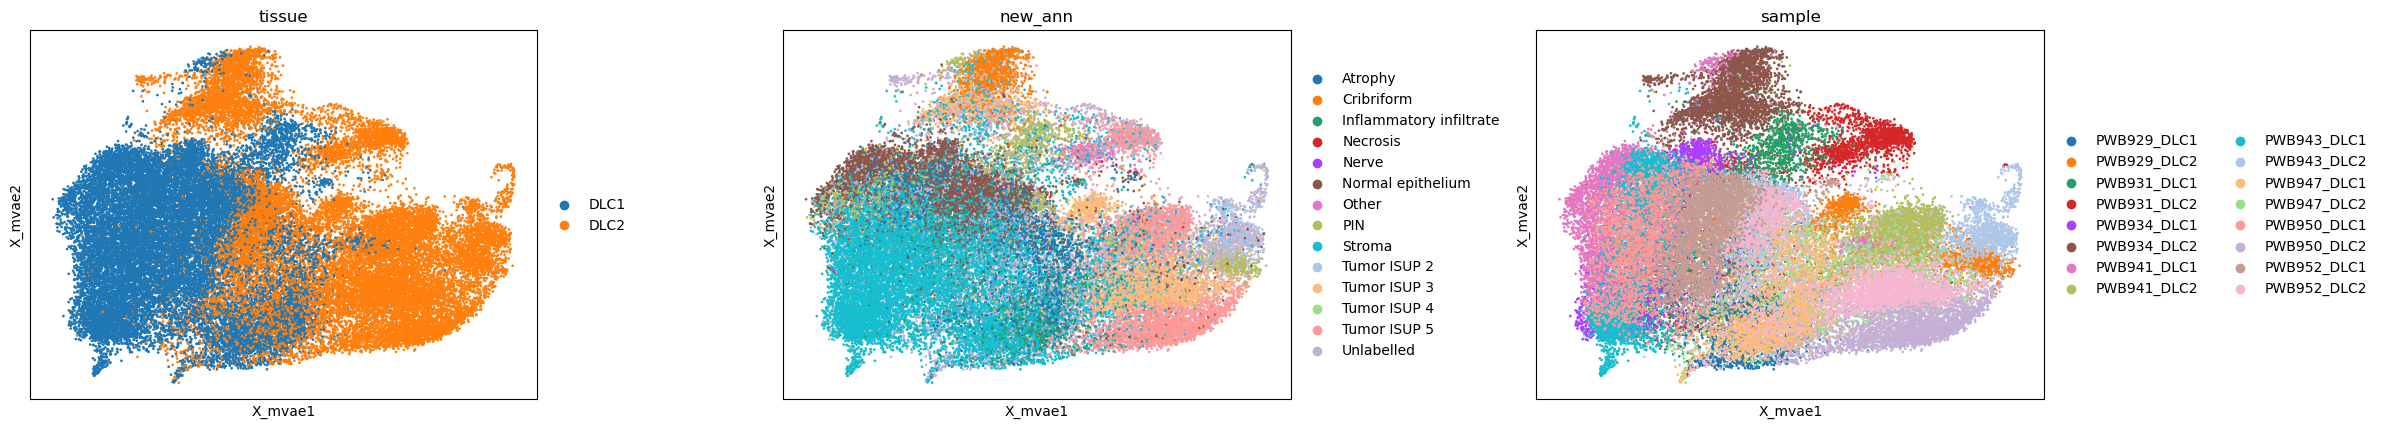

In [19]:
plot_embedding(model, mdata, train_params=train_params, poe_only=False)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


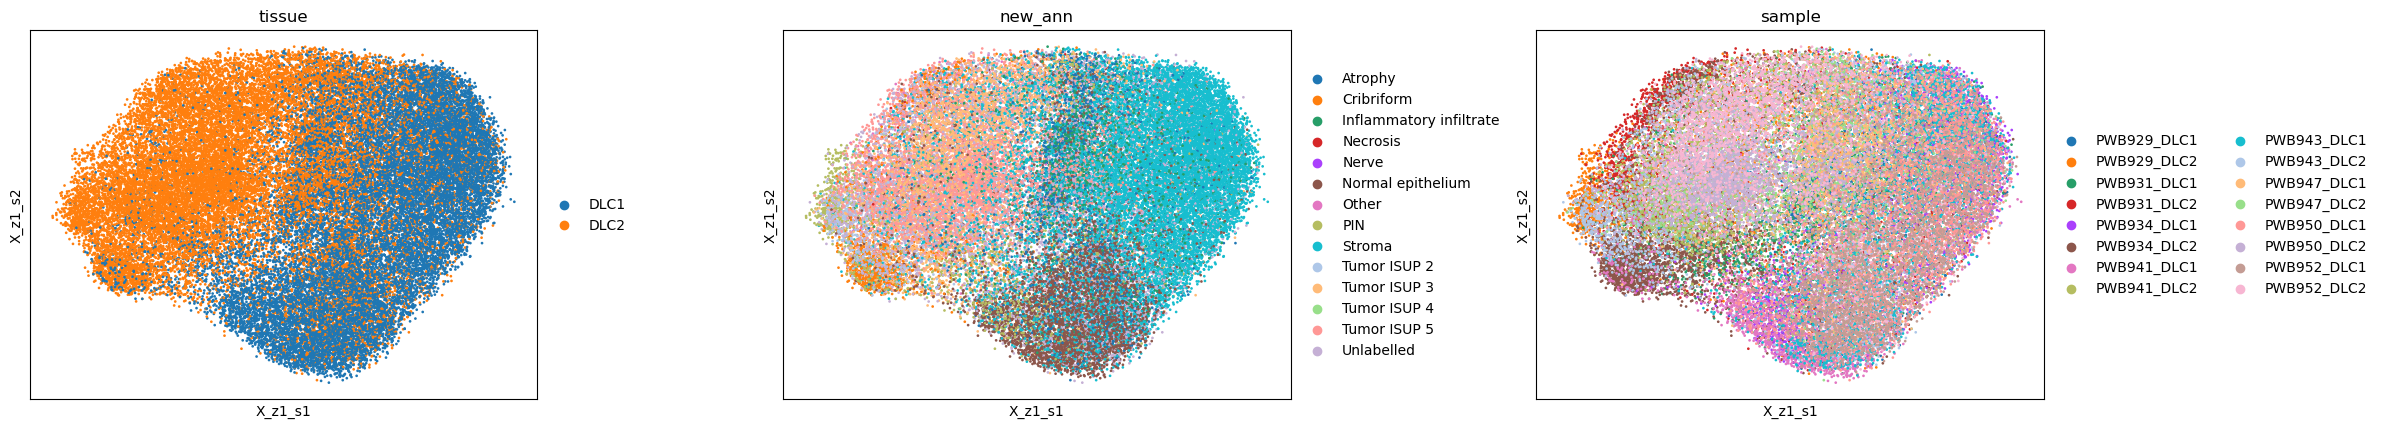

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


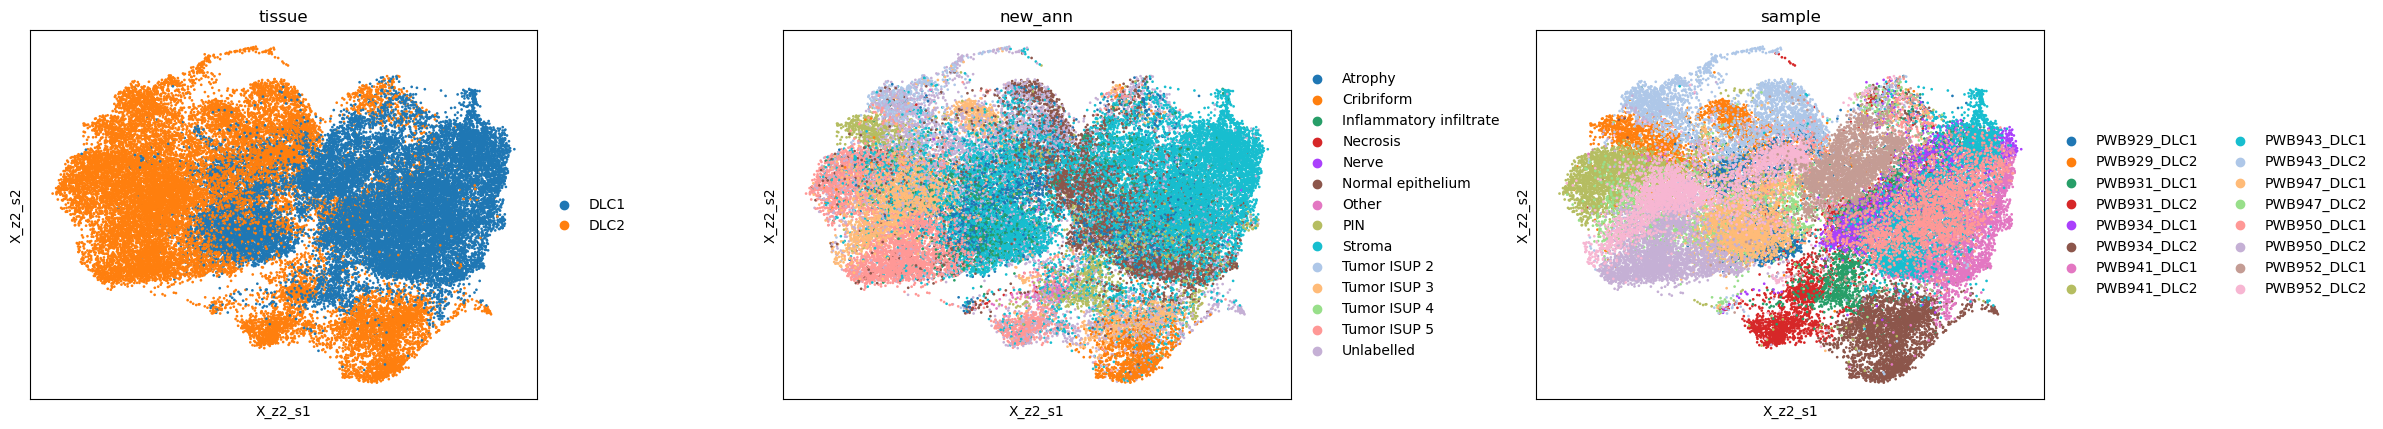

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


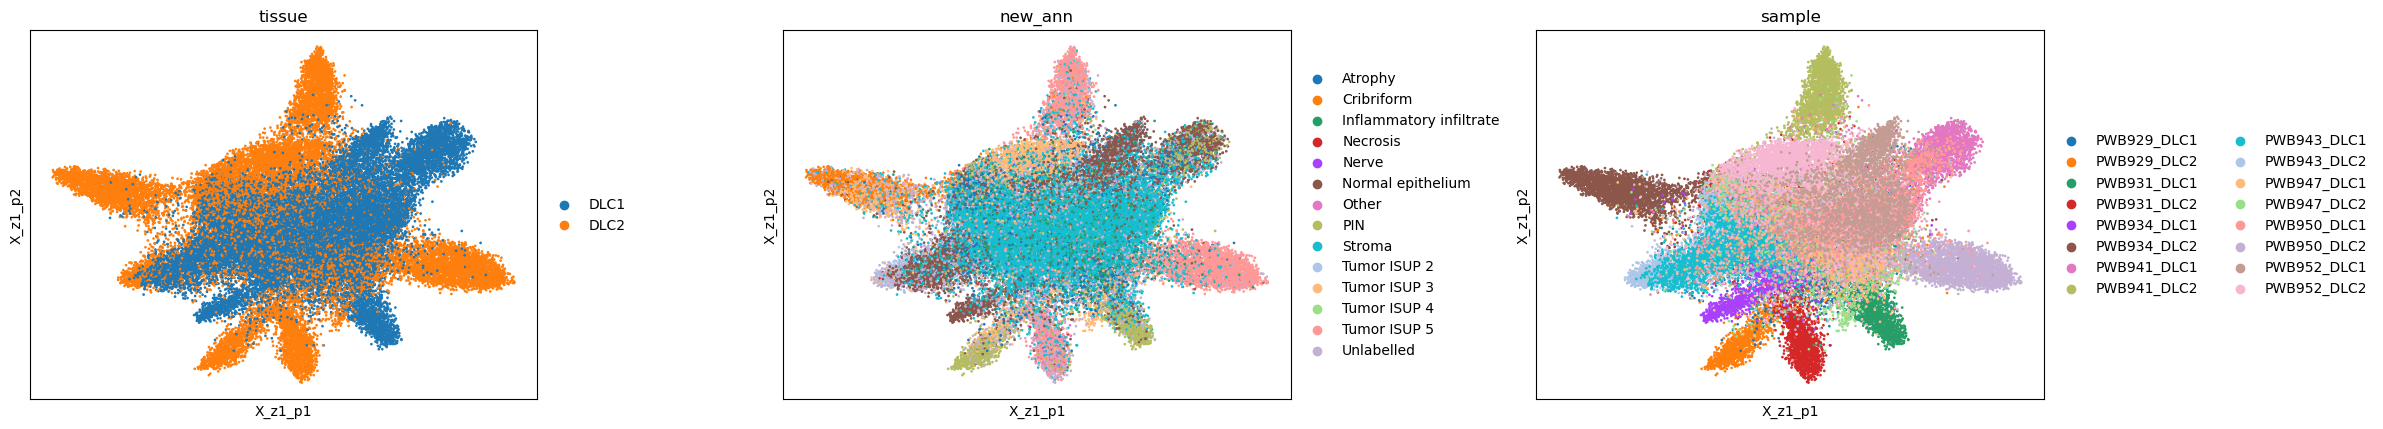

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


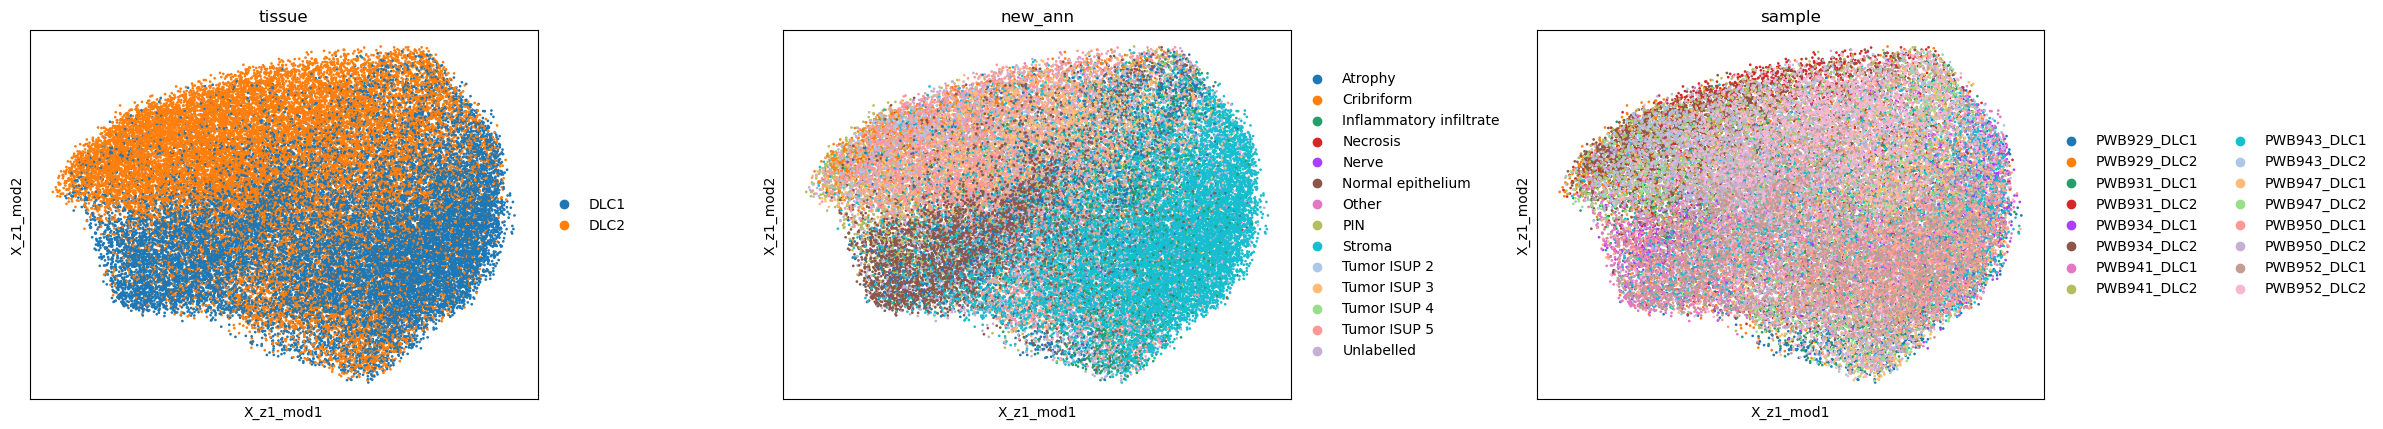

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


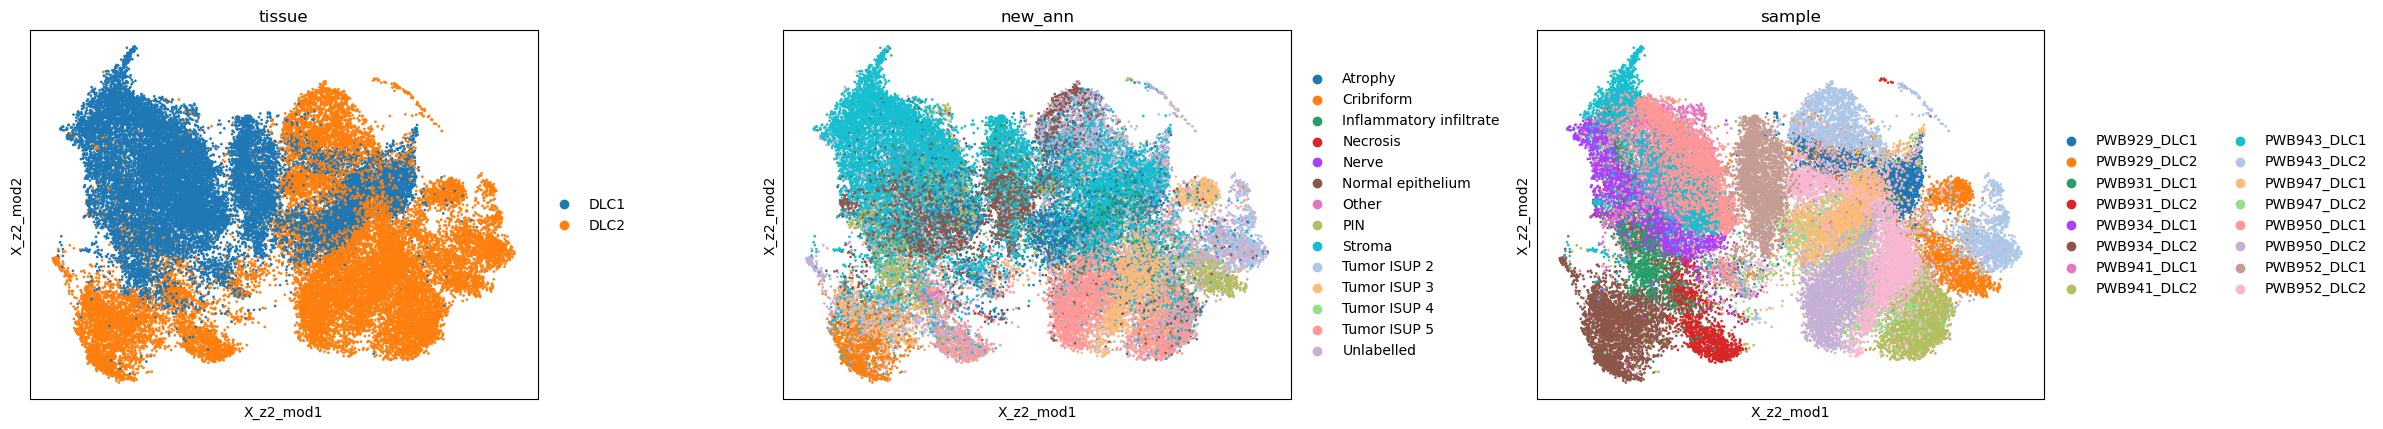

In [21]:
for layer in ["X_z1_s", "X_z2_s", "X_z1_p", "X_z2_p", "X_z1_mod", "X_z2_mod"]:
    sc.pl.embedding(
            mdata,
            layer,
            color=["tissue", "new_ann", "sample"],
            size=15,
            wspace=0.35,
        )

In [22]:
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="mvae_beta0.001_gamma0.0003")
model_params = ModelParams(beta=0.001, gamma=0.0003, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = MVAE(mdata, model_params)

In [24]:
train_mvae(model, mdata, train_params,"sample")

Train data size: 33980
Test data size: 8495


100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:03<00:00,  1.45it/s]

EarlyStopping (epoch: 1): train loss improved to 0.07248113398133761



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.59it/s]

EarlyStopping (epoch: 1): valid loss improved to 4.2377183330592825



100%|██████████████████████████████████████████████████████████████████████| 266/266 [02:59<00:00,  1.48it/s]

EarlyStopping (epoch: 2): train loss improved to 0.028837922806596673



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.59it/s]

EarlyStopping (epoch: 2): valid loss improved to 3.329023019591374



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.58it/s]

EarlyStopping (epoch: 3): valid loss improved to 2.9445895543738976



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.58it/s]

EarlyStopping (epoch: 4): valid loss improved to 2.729077894296219



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.58it/s]

EarlyStopping (epoch: 5): valid loss improved to 2.608490114781394



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.58it/s]

EarlyStopping (epoch: 6): valid loss improved to 2.5230174705163755



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.57it/s]

EarlyStopping (epoch: 7): valid loss improved to 2.461763022550896



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.58it/s]

EarlyStopping (epoch: 8): valid loss improved to 2.424596971540309



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.59it/s]

EarlyStopping (epoch: 9): valid loss improved to 2.3888084674949077



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.59it/s]

EarlyStopping (epoch: 10): valid loss improved to 2.3677122984359515



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.58it/s]

EarlyStopping (epoch: 11): valid loss improved to 2.3402317566658133



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:00<00:00,  1.48it/s]

EarlyStopping (epoch: 12): train loss hasn't improved: 0.018896084985289593. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.58it/s]

EarlyStopping (epoch: 12): valid loss improved to 2.3214117235212184



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:00<00:00,  1.48it/s]

EarlyStopping (epoch: 13): train loss improved to 0.018747922432569984



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.59it/s]

EarlyStopping (epoch: 14): valid loss improved to 2.2924865039426887



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.60it/s]

EarlyStopping (epoch: 16): valid loss improved to 2.2794777884412167



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.59it/s]

EarlyStopping (epoch: 18): valid loss improved to 2.262631071147634



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.58it/s]

EarlyStopping (epoch: 20): valid loss improved to 2.2509002792301462



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:01<00:00,  1.46it/s]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.018123608501326553. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.57it/s]

EarlyStopping (epoch: 23): valid loss improved to 2.2375778155540353



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:03<00:00,  1.45it/s]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.018093211907650036. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:03<00:00,  1.45it/s]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.01806043110713319. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:03<00:00,  1.45it/s]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.018050041487807734. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:03<00:00,  1.45it/s]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.01801807433454481. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:03<00:00,  1.45it/s]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.01800157316577231. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:02<00:00,  1.46it/s]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.017984217394794555. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.57it/s]

EarlyStopping (epoch: 29): valid loss improved to 2.224557901496318



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:00<00:00,  1.47it/s]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.01797610079982549. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:00<00:00,  1.47it/s]

EarlyStopping (epoch: 31): train loss hasn't improved: 0.017958138668235434. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [02:59<00:00,  1.48it/s]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.017938344053411007. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:01<00:00,  1.47it/s]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.017927157619267508. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:00<00:00,  1.47it/s]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.017904800762493095. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [02:59<00:00,  1.48it/s]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.017893510786767142. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:41<00:00,  1.60it/s]

EarlyStopping (epoch: 35): valid loss improved to 2.2114618287157657



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:00<00:00,  1.47it/s]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.017875913404730784. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [02:59<00:00,  1.48it/s]

EarlyStopping (epoch: 37): train loss hasn't improved: 0.017880020406822936. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [02:59<00:00,  1.48it/s]

EarlyStopping (epoch: 38): train loss hasn't improved: 0.017866612308652628. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:00<00:00,  1.48it/s]

EarlyStopping (epoch: 39): train loss hasn't improved: 0.01785466946034378. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [02:59<00:00,  1.48it/s]

EarlyStopping (epoch: 40): train loss hasn't improved: 0.017843685029463742. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:01<00:00,  1.47it/s]

EarlyStopping (epoch: 41): train loss hasn't improved: 0.01783016777656021. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:01<00:00,  1.47it/s]

EarlyStopping (epoch: 42): train loss hasn't improved: 0.017821117349762716. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:01<00:00,  1.47it/s]

EarlyStopping (epoch: 43): train loss hasn't improved: 0.017817369547221434. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:01<00:00,  1.46it/s]

EarlyStopping (epoch: 44): train loss hasn't improved: 0.017806849534403514. Stopping.



100%|██████████████████████████████████████████████████████████████████████| 266/266 [03:14<00:00,  1.37it/s]

EarlyStopping (epoch: 45): train loss hasn't improved: 0.01779969453530988. Stopping.



100%|████████████████████████████████████████████████████████████████████████| 67/67 [00:42<00:00,  1.57it/s]

EarlyStopping (epoch: 45): valid loss hasn't improved: 2.2109061390606324. Stopping.


{'train_loss': [0.07248113398133761,
  0.028837922806596673,
  0.024875138569327226,
  0.02276276319149033,
  0.021505864568848412,
  0.020732398977554706,
  0.020190433827198696,
  0.019792398443777746,
  0.019481071947321182,
  0.0192257984446525,
  0.019020276416253173,
  0.018896084985289593,
  0.018747922432569984,
  0.01862871512165485,
  0.018537049366489027,
  0.018476596490434507,
  0.018407040262587146,
  0.018339490497582375,
  0.01829412240993282,
  0.018223013037299323,
  0.018196869415700822,
  0.018152004904856467,
  0.018123608501326553,
  0.018093211907650036,
  0.01806043110713319,
  0.018050041487807734,
  0.01801807433454481,
  0.01800157316577231,
  0.017984217394794555,
  0.01797610079982549,
  0.017958138668235434,
  0.017938344053411007,
  0.017927157619267508,
  0.017904800762493095,
  0.017893510786767142,
  0.017875913404730784,
  0.017880020406822936,
  0.017866612308652628,
  0.01785466946034378,
  0.017843685029463742,
  0.01783016777656021,
  0.0178211173

### beta=0.01, gamma=0.0005

In [25]:
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="mvae_beta0.001_gamma0.0005")
model_params = ModelParams(beta=0.001, gamma=0.0005, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = MVAE(mdata, model_params)

In [ ]:
train_mvae(model, mdata, train_params,"sample")

Train data size: 33980
Test data size: 8495


 92%|████████████████████████████████████████████████████████████████▏     | 244/266 [02:45<00:14,  1.53it/s]